In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

dt = pd.read_csv("Desktop/School/ENVIR208/Final project/California Independent System Operator (CISO) subregions.csv")

In [4]:
dt

,Date,EBA.CISO-SDGE.D.H,EBA.CISO-SCE.D.H,EBA.CISO-PGAE.D.H,EBA.CISO-VEA.D.H
0,2015-07-01 05:00:00+00:00,NaN,NaN,NaN,NaN
1,2015-07-01 06:00:00+00:00,NaN,NaN,NaN,NaN
2,2015-07-01 07:00:00+00:00,NaN,NaN,NaN,NaN
3,2015-07-01 08:00:00+00:00,NaN,NaN,NaN,NaN
4,2015-07-01 09:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
49295,2021-02-13 04:00:00+00:00,NaN,NaN,NaN,NaN
49296,2021-02-13 05:00:00+00:00,NaN,NaN,NaN,NaN
49297,2021-02-13 06:00:00+00:00,NaN,NaN,NaN,NaN
49298,2021-02-13 07:00:00+00:00,NaN,NaN,NaN,NaN


In [5]:
dt = dt.dropna()
dt

,Date,EBA.CISO-SDGE.D.H,EBA.CISO-SCE.D.H,EBA.CISO-PGAE.D.H,EBA.CISO-VEA.D.H
26307,2018-07-01 08:00:00+00:00,2023.0,10681.0,12522.0,61.0
26308,2018-07-01 09:00:00+00:00,1896.0,10197.0,11745.0,56.0
26309,2018-07-01 10:00:00+00:00,1857.0,9776.0,11200.0,53.0
26310,2018-07-01 11:00:00+00:00,1825.0,9508.0,10822.0,51.0
26311,2018-07-01 12:00:00+00:00,1798.0,9431.0,10644.0,50.0
...,...,...,...,...,...
49271,2021-02-12 04:00:00+00:00,2533.0,11606.0,12299.0,61.0
49272,2021-02-12 05:00:00+00:00,2416.0,11274.0,11870.0,58.0
49273,2021-02-12 06:00:00+00:00,2278.0,10836.0,11313.0,56.0
49274,2021-02-12 07:00:00+00:00,2136.0,10247.0,10640.0,53.0


In [7]:
dt['Total demand'] = dt['EBA.CISO-SDGE.D.H'] + dt['EBA.CISO-SCE.D.H'] + dt['EBA.CISO-PGAE.D.H'] + dt['EBA.CISO-VEA.D.H']
dt

<ipython-input-7-c1d79731d2d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Total demand'] = dt['EBA.CISO-SDGE.D.H'] + dt['EBA.CISO-SCE.D.H'] + dt['EBA.CISO-PGAE.D.H'] + dt['EBA.CISO-VEA.D.H']


,Date,EBA.CISO-SDGE.D.H,EBA.CISO-SCE.D.H,EBA.CISO-PGAE.D.H,EBA.CISO-VEA.D.H,Total demand
26307,2018-07-01 08:00:00+00:00,2023.0,10681.0,12522.0,61.0,25287.0
26308,2018-07-01 09:00:00+00:00,1896.0,10197.0,11745.0,56.0,23894.0
26309,2018-07-01 10:00:00+00:00,1857.0,9776.0,11200.0,53.0,22886.0
26310,2018-07-01 11:00:00+00:00,1825.0,9508.0,10822.0,51.0,22206.0
26311,2018-07-01 12:00:00+00:00,1798.0,9431.0,10644.0,50.0,21923.0
...,...,...,...,...,...,...
49271,2021-02-12 04:00:00+00:00,2533.0,11606.0,12299.0,61.0,26499.0
49272,2021-02-12 05:00:00+00:00,2416.0,11274.0,11870.0,58.0,25618.0
49273,2021-02-12 06:00:00+00:00,2278.0,10836.0,11313.0,56.0,24483.0
49274,2021-02-12 07:00:00+00:00,2136.0,10247.0,10640.0,53.0,23076.0


In [8]:
# Combined total energy demand in California

dt.drop(columns=['EBA.CISO-SDGE.D.H', 'EBA.CISO-SCE.D.H', 'EBA.CISO-PGAE.D.H', 'EBA.CISO-VEA.D.H'], inplace=True)
dt

/Users/tsedensodnomuranbold/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Total demand
26307,2018-07-01 08:00:00+00:00,25287.0
26308,2018-07-01 09:00:00+00:00,23894.0
26309,2018-07-01 10:00:00+00:00,22886.0
26310,2018-07-01 11:00:00+00:00,22206.0
26311,2018-07-01 12:00:00+00:00,21923.0
...,...,...
49271,2021-02-12 04:00:00+00:00,26499.0
49272,2021-02-12 05:00:00+00:00,25618.0
49273,2021-02-12 06:00:00+00:00,24483.0
49274,2021-02-12 07:00:00+00:00,23076.0


In [9]:
dt = dt.drop_duplicates(subset=['Date'])
print(dt)


                            Date  Total demand
26307  2018-07-01 08:00:00+00:00       25287.0
26308  2018-07-01 09:00:00+00:00       23894.0
26309  2018-07-01 10:00:00+00:00       22886.0
26310  2018-07-01 11:00:00+00:00       22206.0
26311  2018-07-01 12:00:00+00:00       21923.0
...                          ...           ...
49271  2021-02-12 04:00:00+00:00       26499.0
49272  2021-02-12 05:00:00+00:00       25618.0
49273  2021-02-12 06:00:00+00:00       24483.0
49274  2021-02-12 07:00:00+00:00       23076.0
49275  2021-02-12 08:00:00+00:00       21689.0

[22929 rows x 2 columns]


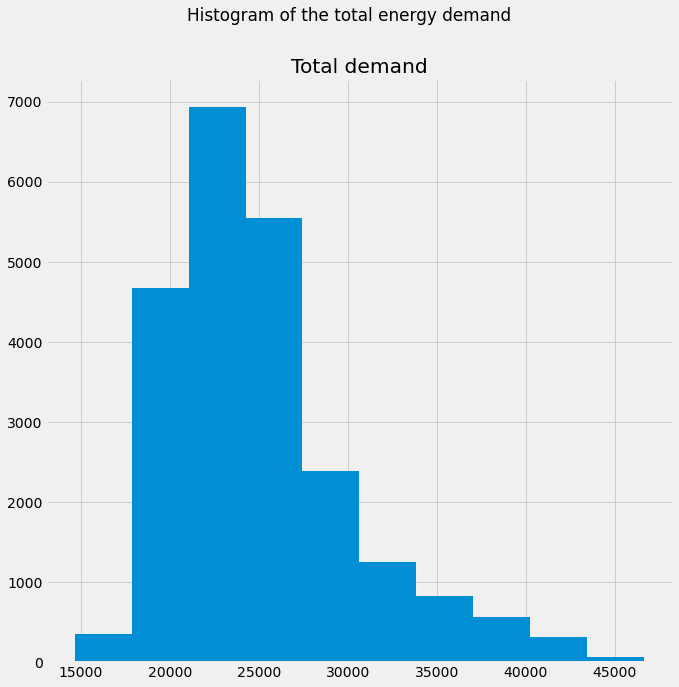

In [10]:
dt.hist(figsize=(10,10))
plt.suptitle('Histogram of the total energy demand')
plt.show()

In [14]:
# Weather data in California

df = pd.read_csv('Desktop/School/ENVIR208/Final project/SUU.csv')
df


,station,valid,tmpc,dwpc,relh,sped,p01m
0,SUU,2018-07-01 00:58,35.00,10.11,21.96,17.25,0.00
1,SUU,2018-07-01 01:58,33.22,9.89,23.89,14.95,0.00
2,SUU,2018-07-01 02:58,29.00,10.11,30.85,12.65,0.00
3,SUU,2018-07-01 03:58,23.50,11.22,45.99,16.10,0.00
4,SUU,2018-07-01 04:58,21.11,11.67,54.98,23.00,0.00
...,...,...,...,...,...,...,...
30688,SUU,2021-02-12 19:58,18.00,5.22,42.94,0.00,0.00
30689,SUU,2021-02-12 20:58,18.50,5.00,40.98,3.45,0.00
30690,SUU,2021-02-12 21:58,17.89,6.67,47.97,8.05,0.00
30691,SUU,2021-02-12 22:58,16.50,6.67,51.98,6.90,0.00


In [15]:
# Remove the first 9 rows
df = df[8:]

# Remove the last 16 rows
df = df[:-16]

df

,station,valid,tmpc,dwpc,relh,sped,p01m
8,SUU,2018-07-01 08:58,17.78,12.22,70.17,21.85,0.00
9,SUU,2018-07-01 09:58,17.00,12.00,72.38,19.55,0.00
10,SUU,2018-07-01 10:58,16.67,12.11,74.74,18.40,0.00
11,SUU,2018-07-01 11:58,16.67,11.67,71.80,20.70,0.00
12,SUU,2018-07-01 12:58,16.67,11.67,71.80,19.55,0.00
...,...,...,...,...,...,...,...
30672,SUU,2021-02-12 05:58,11.39,11.11,98.18,14.95,0.25
30673,SUU,2021-02-12 06:13,11.00,10.00,93.55,14.95,0.00
30674,SUU,2021-02-12 06:58,9.72,8.61,92.78,14.95,0.00
30675,SUU,2021-02-12 07:13,10.00,9.00,93.50,14.95,0.00


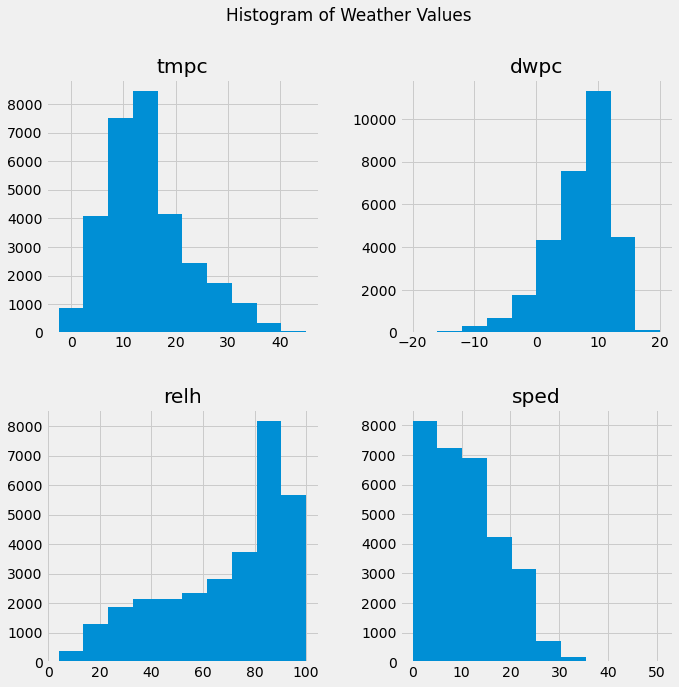

In [16]:
df.hist(figsize=(10,10))
plt.suptitle('Histogram of Weather Values')
plt.show()

In [17]:
from datetime import datetime

# Parse the dates in the 'valid' column
df['valid'] = pd.to_datetime(df['valid'])

# Round the hour down for all values in the 'valid' column
df['valid'] = df['valid'].dt.floor('H')

# Format the date as required
df['valid'] = df['valid'].dt.strftime('%Y-%m-%d %H:%M:%S+00:00')

print(df)

      station                      valid   tmpc   dwpc   relh   sped  p01m
8         SUU  2018-07-01 08:00:00+00:00  17.78  12.22  70.17  21.85  0.00
9         SUU  2018-07-01 09:00:00+00:00  17.00  12.00  72.38  19.55  0.00
10        SUU  2018-07-01 10:00:00+00:00  16.67  12.11  74.74  18.40  0.00
11        SUU  2018-07-01 11:00:00+00:00  16.67  11.67  71.80  20.70  0.00
12        SUU  2018-07-01 12:00:00+00:00  16.67  11.67  71.80  19.55  0.00
...       ...                        ...    ...    ...    ...    ...   ...
30672     SUU  2021-02-12 05:00:00+00:00  11.39  11.11  98.18  14.95  0.25
30673     SUU  2021-02-12 06:00:00+00:00  11.00  10.00  93.55  14.95  0.00
30674     SUU  2021-02-12 06:00:00+00:00   9.72   8.61  92.78  14.95  0.00
30675     SUU  2021-02-12 07:00:00+00:00  10.00   9.00  93.50  14.95  0.00
30676     SUU  2021-02-12 07:00:00+00:00   9.61   7.00  83.76  23.00  0.00

[30669 rows x 7 columns]


In [18]:
df

,station,valid,tmpc,dwpc,relh,sped,p01m
8,SUU,2018-07-01 08:00:00+00:00,17.78,12.22,70.17,21.85,0.00
9,SUU,2018-07-01 09:00:00+00:00,17.00,12.00,72.38,19.55,0.00
10,SUU,2018-07-01 10:00:00+00:00,16.67,12.11,74.74,18.40,0.00
11,SUU,2018-07-01 11:00:00+00:00,16.67,11.67,71.80,20.70,0.00
12,SUU,2018-07-01 12:00:00+00:00,16.67,11.67,71.80,19.55,0.00
...,...,...,...,...,...,...,...
30672,SUU,2021-02-12 05:00:00+00:00,11.39,11.11,98.18,14.95,0.25
30673,SUU,2021-02-12 06:00:00+00:00,11.00,10.00,93.55,14.95,0.00
30674,SUU,2021-02-12 06:00:00+00:00,9.72,8.61,92.78,14.95,0.00
30675,SUU,2021-02-12 07:00:00+00:00,10.00,9.00,93.50,14.95,0.00


In [19]:
df = df.drop_duplicates(subset=['valid'])
print(df)

      station                      valid   tmpc   dwpc   relh   sped  p01m
8         SUU  2018-07-01 08:00:00+00:00  17.78  12.22  70.17  21.85  0.00
9         SUU  2018-07-01 09:00:00+00:00  17.00  12.00  72.38  19.55  0.00
10        SUU  2018-07-01 10:00:00+00:00  16.67  12.11  74.74  18.40  0.00
11        SUU  2018-07-01 11:00:00+00:00  16.67  11.67  71.80  20.70  0.00
12        SUU  2018-07-01 12:00:00+00:00  16.67  11.67  71.80  19.55  0.00
...       ...                        ...    ...    ...    ...    ...   ...
30663     SUU  2021-02-12 03:00:00+00:00  11.00  10.00  93.55   8.05  0.00
30667     SUU  2021-02-12 04:00:00+00:00  11.00  10.00  93.55   4.60  0.00
30669     SUU  2021-02-12 05:00:00+00:00  11.00  10.00  93.55   0.00  0.00
30673     SUU  2021-02-12 06:00:00+00:00  11.00  10.00  93.55  14.95  0.00
30675     SUU  2021-02-12 07:00:00+00:00  10.00   9.00  93.50  14.95  0.00

[22282 rows x 7 columns]


In [20]:
df = df.rename(columns={'valid': 'Date'})

print(df)

      station                       Date   tmpc   dwpc   relh   sped  p01m
8         SUU  2018-07-01 08:00:00+00:00  17.78  12.22  70.17  21.85  0.00
9         SUU  2018-07-01 09:00:00+00:00  17.00  12.00  72.38  19.55  0.00
10        SUU  2018-07-01 10:00:00+00:00  16.67  12.11  74.74  18.40  0.00
11        SUU  2018-07-01 11:00:00+00:00  16.67  11.67  71.80  20.70  0.00
12        SUU  2018-07-01 12:00:00+00:00  16.67  11.67  71.80  19.55  0.00
...       ...                        ...    ...    ...    ...    ...   ...
30663     SUU  2021-02-12 03:00:00+00:00  11.00  10.00  93.55   8.05  0.00
30667     SUU  2021-02-12 04:00:00+00:00  11.00  10.00  93.55   4.60  0.00
30669     SUU  2021-02-12 05:00:00+00:00  11.00  10.00  93.55   0.00  0.00
30673     SUU  2021-02-12 06:00:00+00:00  11.00  10.00  93.55  14.95  0.00
30675     SUU  2021-02-12 07:00:00+00:00  10.00   9.00  93.50  14.95  0.00

[22282 rows x 7 columns]


In [21]:
data = pd.merge(dt, df, on='Date', how='inner')
print (data)

                            Date  Total demand station   tmpc   dwpc   relh  \
0      2018-07-01 08:00:00+00:00       25287.0     SUU  17.78  12.22  70.17   
1      2018-07-01 09:00:00+00:00       23894.0     SUU  17.00  12.00  72.38   
2      2018-07-01 10:00:00+00:00       22886.0     SUU  16.67  12.11  74.74   
3      2018-07-01 11:00:00+00:00       22206.0     SUU  16.67  11.67  71.80   
4      2018-07-01 12:00:00+00:00       21923.0     SUU  16.67  11.67  71.80   
...                          ...           ...     ...    ...    ...    ...   
22237  2021-02-12 03:00:00+00:00       27189.0     SUU  11.00  10.00  93.55   
22238  2021-02-12 04:00:00+00:00       26499.0     SUU  11.00  10.00  93.55   
22239  2021-02-12 05:00:00+00:00       25618.0     SUU  11.00  10.00  93.55   
22240  2021-02-12 06:00:00+00:00       24483.0     SUU  11.00  10.00  93.55   
22241  2021-02-12 07:00:00+00:00       23076.0     SUU  10.00   9.00  93.50   

        sped  p01m  
0      21.85  0.00  
1      19

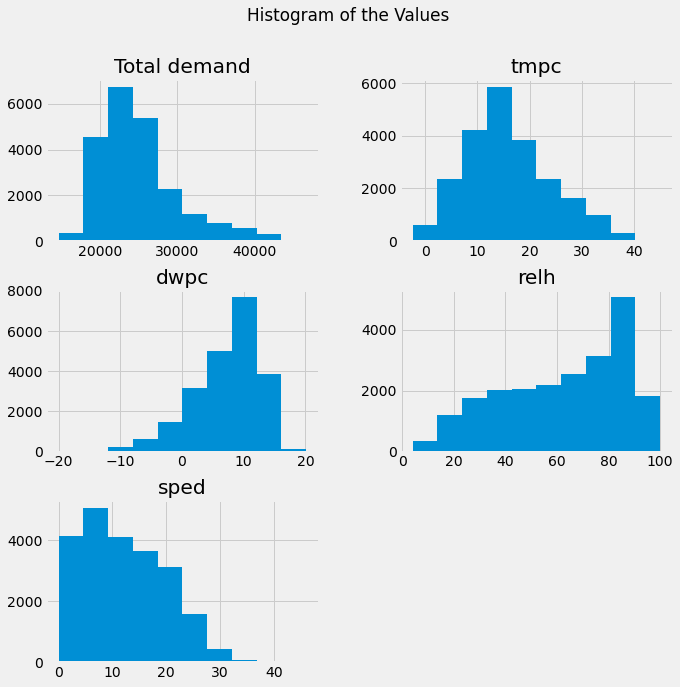

In [22]:
data.hist(figsize=(10,10))
plt.suptitle('Histogram of the Values')
plt.show()

In [23]:
print (data)

                            Date  Total demand station   tmpc   dwpc   relh  \
0      2018-07-01 08:00:00+00:00       25287.0     SUU  17.78  12.22  70.17   
1      2018-07-01 09:00:00+00:00       23894.0     SUU  17.00  12.00  72.38   
2      2018-07-01 10:00:00+00:00       22886.0     SUU  16.67  12.11  74.74   
3      2018-07-01 11:00:00+00:00       22206.0     SUU  16.67  11.67  71.80   
4      2018-07-01 12:00:00+00:00       21923.0     SUU  16.67  11.67  71.80   
...                          ...           ...     ...    ...    ...    ...   
22237  2021-02-12 03:00:00+00:00       27189.0     SUU  11.00  10.00  93.55   
22238  2021-02-12 04:00:00+00:00       26499.0     SUU  11.00  10.00  93.55   
22239  2021-02-12 05:00:00+00:00       25618.0     SUU  11.00  10.00  93.55   
22240  2021-02-12 06:00:00+00:00       24483.0     SUU  11.00  10.00  93.55   
22241  2021-02-12 07:00:00+00:00       23076.0     SUU  10.00   9.00  93.50   

        sped  p01m  
0      21.85  0.00  
1      19

In [24]:
data.drop(columns=['station'], inplace=True)
data

,Date,Total demand,tmpc,dwpc,relh,sped,p01m
0,2018-07-01 08:00:00+00:00,25287.0,17.78,12.22,70.17,21.85,0.00
1,2018-07-01 09:00:00+00:00,23894.0,17.00,12.00,72.38,19.55,0.00
2,2018-07-01 10:00:00+00:00,22886.0,16.67,12.11,74.74,18.40,0.00
3,2018-07-01 11:00:00+00:00,22206.0,16.67,11.67,71.80,20.70,0.00
4,2018-07-01 12:00:00+00:00,21923.0,16.67,11.67,71.80,19.55,0.00
...,...,...,...,...,...,...,...
22237,2021-02-12 03:00:00+00:00,27189.0,11.00,10.00,93.55,8.05,0.00
22238,2021-02-12 04:00:00+00:00,26499.0,11.00,10.00,93.55,4.60,0.00
22239,2021-02-12 05:00:00+00:00,25618.0,11.00,10.00,93.55,0.00,0.00
22240,2021-02-12 06:00:00+00:00,24483.0,11.00,10.00,93.55,14.95,0.00


In [48]:
# Creation of extra features

import pandas as pd
import numpy as np 
import datetime

data['Date'] = pd.to_datetime(data['Date'])

data['dayofweek'] = data['Date'].dt.dayofweek
data['hour'] = data['Date'].dt.hour
data['month'] = data['Date'].dt.month
data[['Date', 'dayofweek', 'hour', 'month']].head()

data

,Date,Total demand,tmpc,dwpc,relh,sped,p01m,dayofweek,hour,month,demand_ma
0,2018-07-01 08:00:00+00:00,25287.0,17.78,12.22,70.17,21.85,0.00,6,8,7,NaN
1,2018-07-01 09:00:00+00:00,23894.0,17.00,12.00,72.38,19.55,0.00,6,9,7,NaN
2,2018-07-01 10:00:00+00:00,22886.0,16.67,12.11,74.74,18.40,0.00,6,10,7,NaN
3,2018-07-01 11:00:00+00:00,22206.0,16.67,11.67,71.80,20.70,0.00,6,11,7,NaN
4,2018-07-01 12:00:00+00:00,21923.0,16.67,11.67,71.80,19.55,0.00,6,12,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
22237,2021-02-12 03:00:00+00:00,27189.0,11.00,10.00,93.55,8.05,0.00,4,3,2,23197.083333
22238,2021-02-12 04:00:00+00:00,26499.0,11.00,10.00,93.55,4.60,0.00,4,4,2,23202.083333
22239,2021-02-12 05:00:00+00:00,25618.0,11.00,10.00,93.55,0.00,0.00,4,5,2,23204.541667
22240,2021-02-12 06:00:00+00:00,24483.0,11.00,10.00,93.55,14.95,0.00,4,6,2,23204.083333


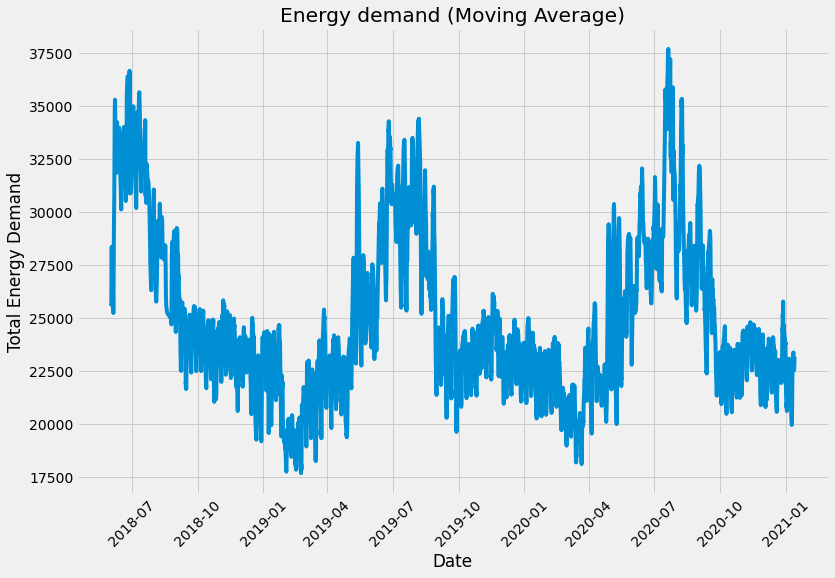

In [27]:
import seaborn as sns

# Compute moving average of 'Total demand' using pandas' rolling function
window_size = 24 
data['demand_ma'] = data['Total demand'].rolling(window=window_size).mean()

# Plot the moving average
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=data, x='Date', y='demand_ma', ax=ax)
ax.set_title('Energy demand (Moving Average)')
ax.set_xlabel('Date')
ax.set_ylabel('Total Energy Demand')

# Customize x-axis ticks to display every 3 months
date_ticks = pd.date_range(start=data['Date'].min(), end=data['Date'].max(), freq='3M')
ax.set_xticks(date_ticks)
ax.set_xticklabels([tick.strftime('%Y-%m') for tick in date_ticks], rotation=45)

plt.show()

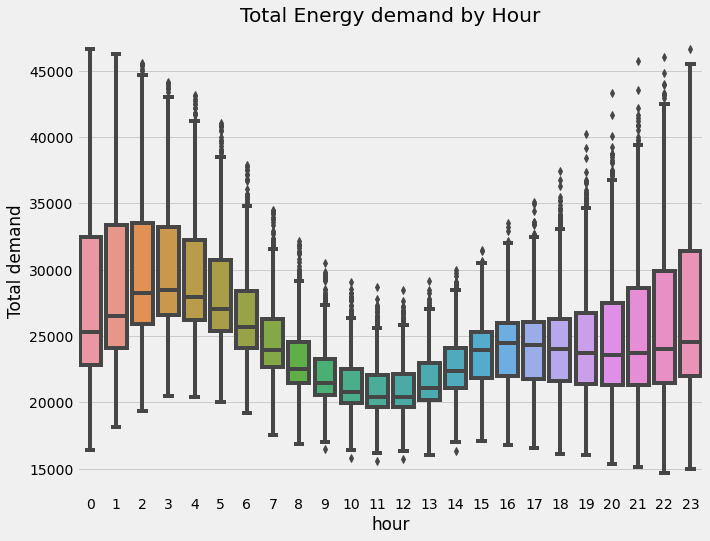

In [28]:
# Hour

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='hour', y='Total demand')
ax.set_title('Total Energy demand by Hour')
plt.show()

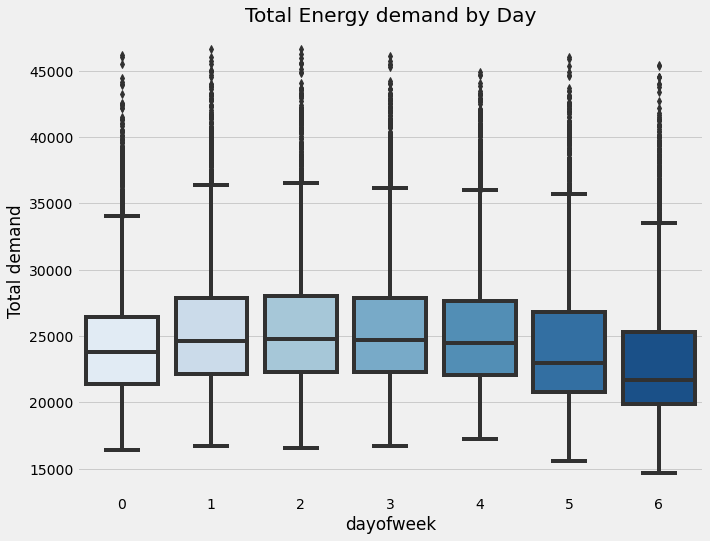

In [29]:
# Days of the week

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='dayofweek', y='Total demand', palette='Blues')
ax.set_title('Total Energy demand by Day')
plt.show()

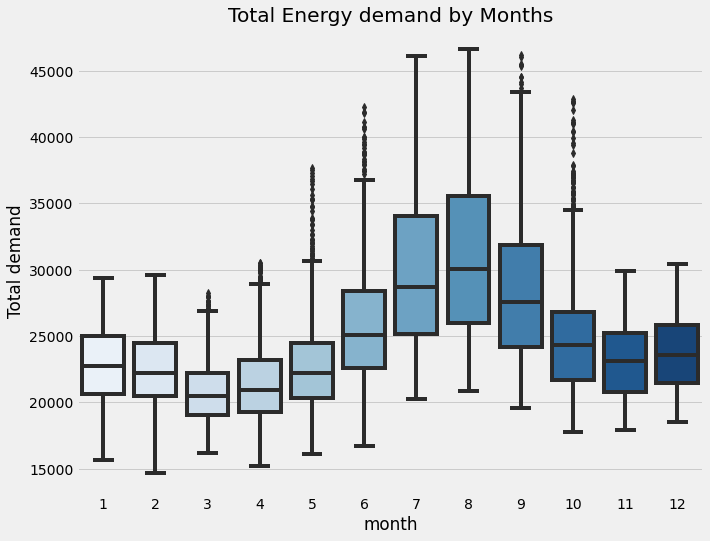

In [30]:
# Month

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='month', y='Total demand', palette='Blues')
ax.set_title('Total Energy demand by Months')
plt.show()

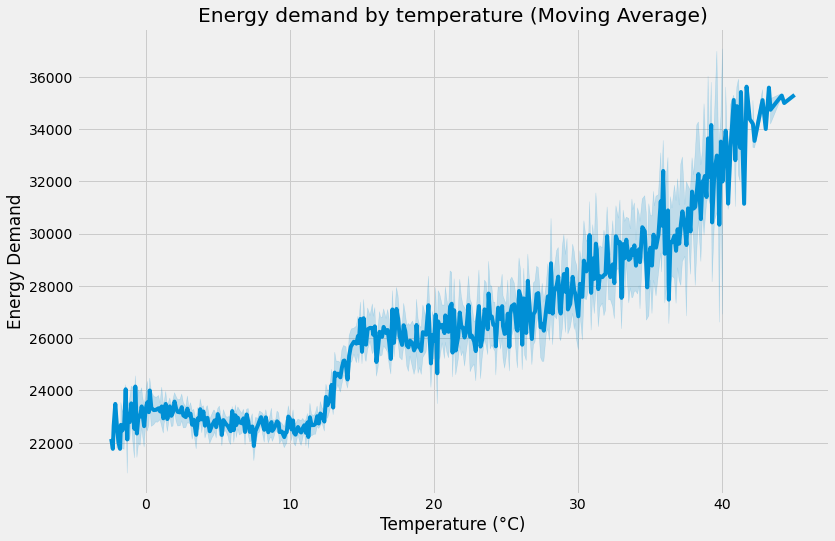

In [31]:
# Temperature

import matplotlib.pyplot as plt
import seaborn as sns


# Compute moving average of 'Total demand' using pandas' rolling function
window_size = 24  
data['demand_ma'] = data['Total demand'].rolling(window=window_size).mean()

# Plot the moving average
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=data, x='tmpc', y='demand_ma', ax=ax)
ax.set_title('Energy demand by temperature (Moving Average)')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Energy Demand')

plt.show()


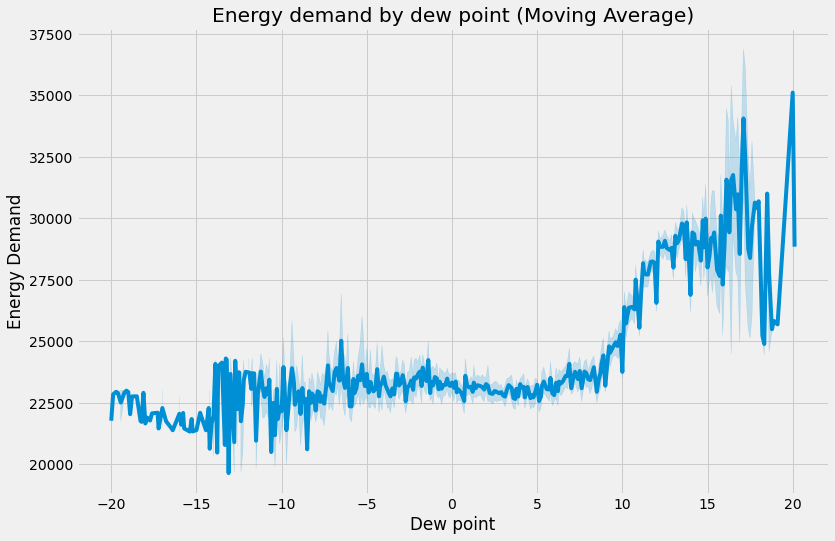

In [32]:
# Dew point

# Plot the moving average
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=data, x='dwpc', y='demand_ma', ax=ax)
ax.set_title('Energy demand by dew point (Moving Average)')
ax.set_xlabel('Dew point')
ax.set_ylabel('Energy Demand')

plt.show()

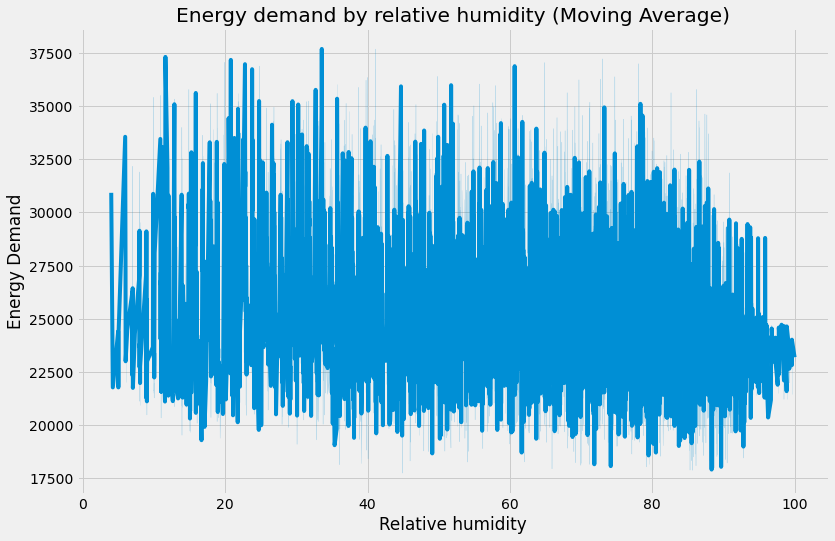

In [33]:
# Relative humidity

# Plot the moving average
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=data, x='relh', y='demand_ma', ax=ax)
ax.set_title('Energy demand by relative humidity (Moving Average)')
ax.set_xlabel('Relative humidity')
ax.set_ylabel('Energy Demand')

plt.show()

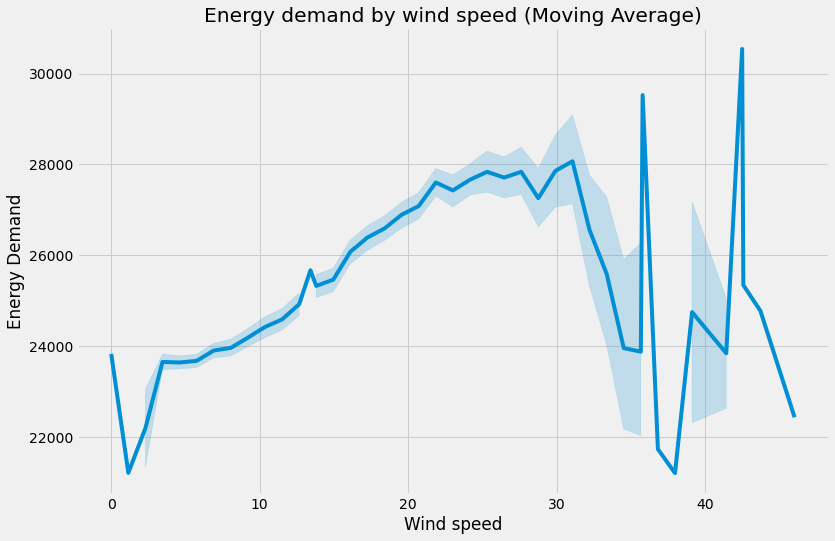

In [34]:
# Wind speed

# Plot the moving average
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=data, x='sped', y='demand_ma', ax=ax)
ax.set_title('Energy demand by wind speed (Moving Average)')
ax.set_xlabel('Wind speed')
ax.set_ylabel('Energy Demand')

plt.show()

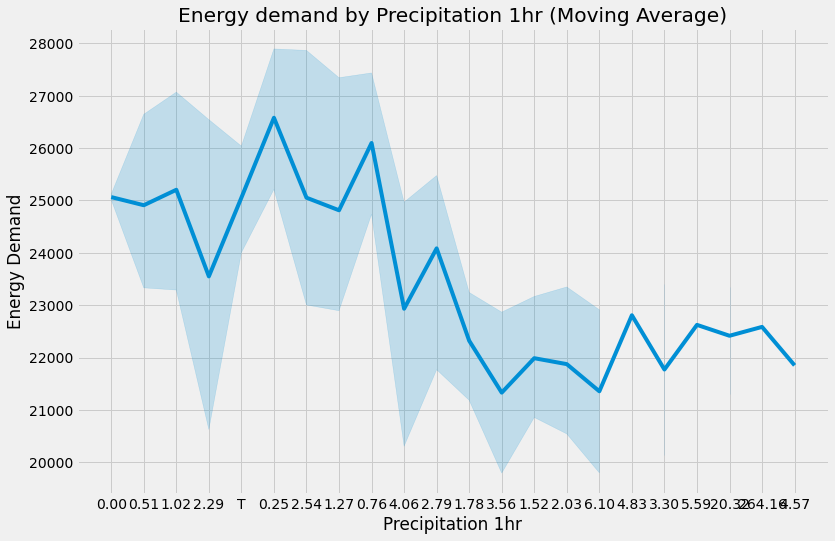

In [35]:
# Precipitation

# Plot the moving average
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=data, x='p01m', y='demand_ma', ax=ax)
ax.set_title('Energy demand by Precipitation 1hr (Moving Average)')
ax.set_xlabel('Precipitation 1hr')
ax.set_ylabel('Energy Demand')

plt.show()

In [38]:
# Model creation - Linear regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Replace 'T' values with a very small numeric value (e.g., 0.001)
data.replace('T', 0.001, inplace=True)

# Feature and Target
X = data[['tmpc', 'dwpc', 'sped', 'relh','p01m','hour','dayofweek','month']]
y = data['Total demand']

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.5, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 13265680.215880163
Coefficients: [ 404.73060849   32.30264625   46.90961315   16.84036857    9.63639493
 -303.79552961 -245.2770401   210.42525301]
Intercept: 19551.80562374187


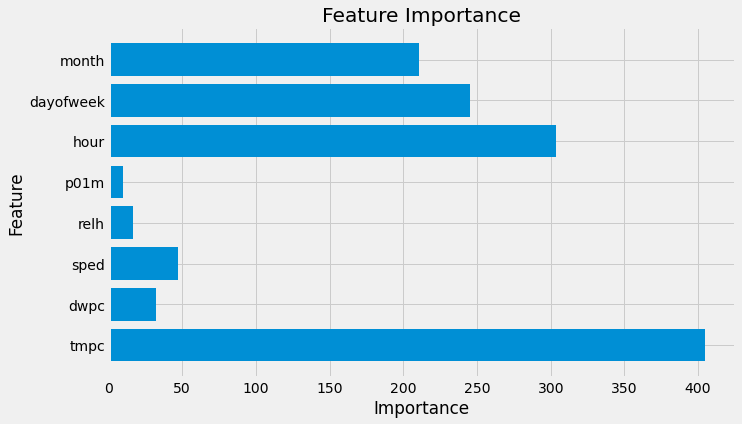

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients and intercept
coefficients = [404.73060849, 32.30264625, 46.90961315, 16.84036857, 9.63639493,
                -303.79552961, -245.2770401, 210.42525301]
intercept = 19551.805623741864

# Feature names
feature_names = ['tmpc', 'dwpc', 'sped', 'relh', 'p01m', 'hour', 'dayofweek', 'month']

# Calculate importance of features (absolute values of coefficients)
importance = np.abs(coefficients)

# Plot importance of features
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


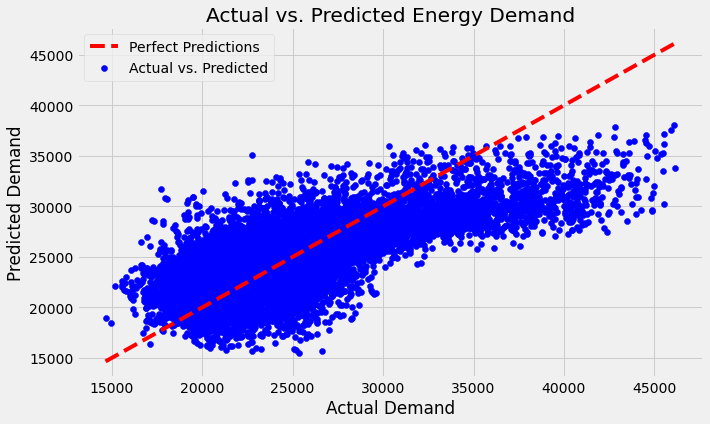

In [39]:
import matplotlib.pyplot as plt

# Visualize train and test split
plt.figure(figsize=(10, 6))

# Plot actual values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Plot the 45-degree line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Predictions')

plt.title('Actual vs. Predicted Energy Demand')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
midpoint_index = len(data) // 2


In [50]:
midpoint_index

11121

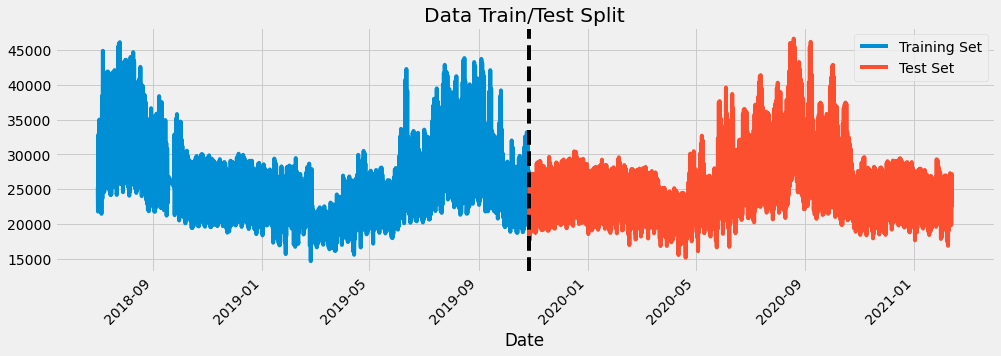

In [60]:
# XGBoost model

import pandas as pd
import matplotlib.pyplot as plt

# Find the midpoint index for splitting the dataset
midpoint_index = 11121

# Split the dataset into training and test sets
train = data.iloc[:midpoint_index]
test = data.iloc[midpoint_index:]

# Plot the training and test sets
fig, ax = plt.subplots(figsize=(15, 5))
train['Total demand'].plot(ax=ax, label='Training Set', title='Data Train/Test Split', x_compat=True)
test['Total demand'].plot(ax=ax, label='Test Set', x_compat=True)
ax.axvline(train.index[-1], color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])

plt.xlabel('Date')
plt.xticks(rotation=45)

plt.show()


In [67]:
FEATURES = ['tmpc', 'dwpc', 'sped', 'relh','hour', 'dayofweek', 'month']
TARGET = 'Total demand'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    early_stopping_rounds=50,
    objective='reg:linear',
    max_depth=3,
    learning_rate=0.01
)
xgb_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              verbose=100)

# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print("Linear Regression Mean Squared Error:", mse_linear)
print("XGBoost Mean Squared Error:", mse_xgb)


[0]	validation_0-rmse:4734.11364
[100]	validation_0-rmse:3057.12016


/Users/tsedensodnomuranbold/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [15:45:26] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:2534.11618
[300]	validation_0-rmse:2351.68196
[400]	validation_0-rmse:2250.42958
[500]	validation_0-rmse:2194.50243
[600]	validation_0-rmse:2157.28827
[700]	validation_0-rmse:2128.77591
[800]	validation_0-rmse:2110.18161
[900]	validation_0-rmse:2098.25235
[999]	validation_0-rmse:2085.86138
Linear Regression Mean Squared Error: 13494890.491428623
XGBoost Mean Squared Error: 4350817.693068808


In [69]:
import matplotlib.pyplot as plt

feature_importance = xgb_model.feature_importances_
print("Feature Importance:", feature_importance)


Feature Importance: [0.35026672 0.07553633 0.0357513  0.01352742 0.15918297 0.06186183
 0.30387342]


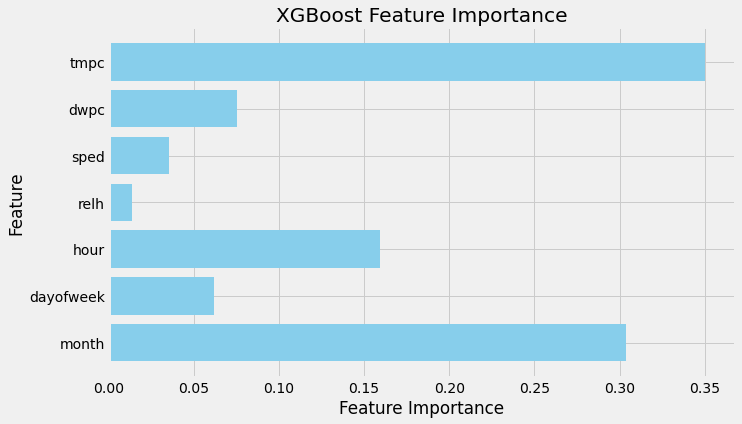

In [70]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

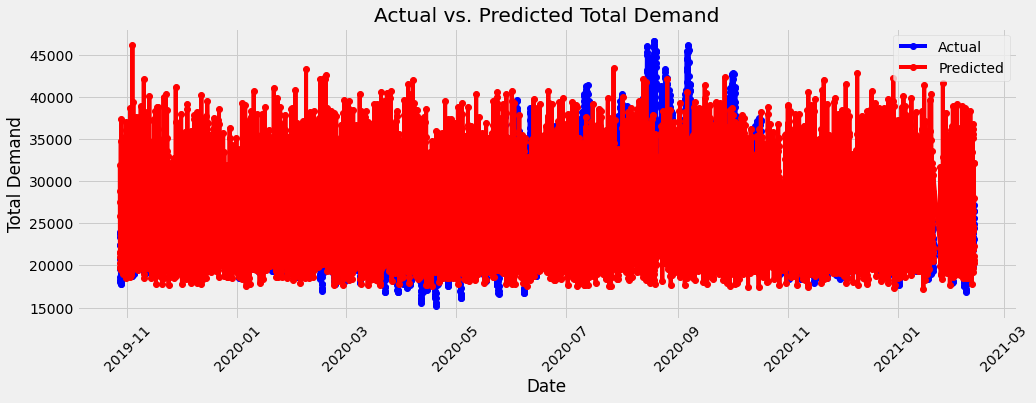

In [72]:
import matplotlib.pyplot as plt

# Trim the predictions array to match the length of the test index
y_pred_trimmed = y_pred[:len(test.index)]

# Plot the actual test data
plt.figure(figsize=(15, 5))
plt.plot(test.index, test['Total demand'], label='Actual', marker='o', color='blue')

# Plot the predictions made by the XGBoost model
plt.plot(test.index, y_pred_trimmed, label='Predicted', marker='o', color='red')

plt.xlabel('Date')
plt.ylabel('Total Demand')
plt.title('Actual vs. Predicted Total Demand')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()


In [73]:
# XGBoost Model 2
FEATURES = ["tmpc", "hour", "dayofweek", "month", "dwpc"]
TARGET = "Total demand"

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

# Rebuild the XGBoost model
import xgboost as xgb
reg_reduced = xgb.XGBRegressor(
    n_estimators=1000,
    early_stopping_rounds=50,
    objective='reg:squarederror',
    max_depth=3,
    learning_rate=0.01,
    random_state=42
)

reg_reduced.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=100)

# Predict using the new model
y_pred_reduced = reg_reduced.predict(X_test)

# Calculate Mean Squared Error
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
print("Mean Squared Error (Reduced Model):", mse_reduced)

# Print feature importance for the reduced model
print("Feature Importance (Reduced Model):", reg_reduced.feature_importances_)


[0]	validation_0-rmse:5520.50232	validation_1-rmse:4734.11364
[100]	validation_0-rmse:3489.87690	validation_1-rmse:3057.10139
[200]	validation_0-rmse:2692.00121	validation_1-rmse:2531.30283
[300]	validation_0-rmse:2340.40635	validation_1-rmse:2339.56739
[400]	validation_0-rmse:2147.32112	validation_1-rmse:2241.05503
[500]	validation_0-rmse:2036.70408	validation_1-rmse:2176.67281
[600]	validation_0-rmse:1964.56048	validation_1-rmse:2136.79892
[700]	validation_0-rmse:1913.87080	validation_1-rmse:2120.71140
[800]	validation_0-rmse:1878.66617	validation_1-rmse:2111.01592
[900]	validation_0-rmse:1851.42268	validation_1-rmse:2103.91887
[999]	validation_0-rmse:1829.89838	validation_1-rmse:2094.20227
Mean Squared Error (Reduced Model): 4385010.503705113
Feature Importance (Reduced Model): [0.39549193 0.16924661 0.07258056 0.29174548 0.07093543]


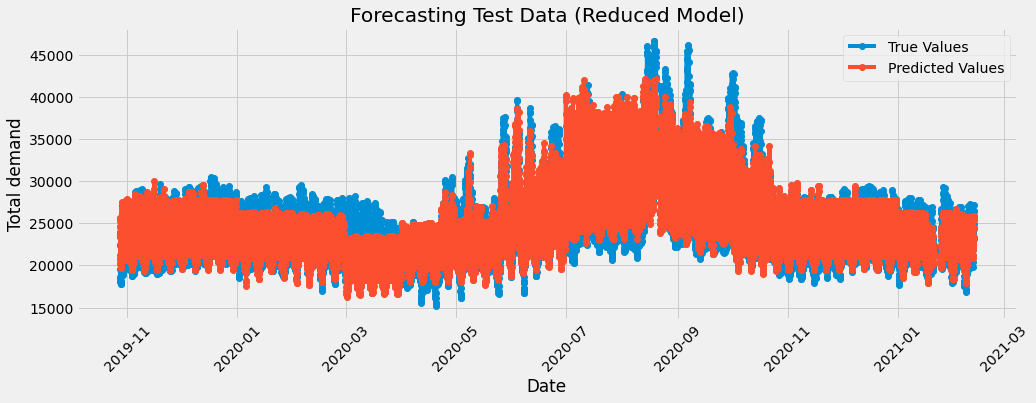

In [78]:
# Visualize the test data and predictions for the reduced model
plt.figure(figsize=(15, 5))
plt.plot(test.index, y_test, label="True Values", marker='o')
plt.plot(test.index, y_pred_reduced, label="Predicted Values", marker='o')
plt.xlabel("Date")
plt.ylabel("Total demand")
plt.title("Forecasting Test Data (Reduced Model)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [81]:

# Predict future demand based on features
future_features = pd.DataFrame({
    'tmpc': [25],
    'hour': [18],
    'dayofweek': [5],
    'month': [7],
    'dwpc': [10]
})

future_features['tmpc'] = future_features['tmpc'].astype(float)
future_features['hour'] = future_features['hour'].astype(int)
future_features['dayofweek'] = future_features['dayofweek'].astype(int)
future_features['month'] = future_features['month'].astype(int)
future_features['dwpc'] = future_features['dwpc'].astype(float)

future_demand = reg_reduced.predict(future_features)

print("Predicted Future Demand:")
print(future_demand)


Predicted Future Demand:
[27745.488]


In [87]:
# Predict future demand based on features

future_features = pd.DataFrame({
    'tmpc': [40],
    'hour': [18],
    'dayofweek': [5],
    'month': [7],
    'dwpc': [10]
})

future_features['tmpc'] = future_features['tmpc'].astype(float)
future_features['hour'] = future_features['hour'].astype(int)
future_features['dayofweek'] = future_features['dayofweek'].astype(int)
future_features['month'] = future_features['month'].astype(int)
future_features['dwpc'] = future_features['dwpc'].astype(float)

future_demand = reg_reduced.predict(future_features)

print("Predicted Future Demand:")
print(future_demand)


Predicted Future Demand:
[32201.78]


In [90]:
# Predict future demand based on features

future_features = pd.DataFrame({
    'tmpc': [10],
    'hour': [18],
    'dayofweek': [7],
    'month': [1],
    'dwpc': [10]
})

future_features['tmpc'] = future_features['tmpc'].astype(float)
future_features['hour'] = future_features['hour'].astype(int)
future_features['dayofweek'] = future_features['dayofweek'].astype(int)
future_features['month'] = future_features['month'].astype(int)
future_features['dwpc'] = future_features['dwpc'].astype(float)

future_demand = reg_reduced.predict(future_features)

print("Predicted Future Demand:")
print(future_demand)


Predicted Future Demand:
[20044.662]


In [95]:
# Predict future demand based on features

future_features = pd.DataFrame({
    'tmpc': [30],
    'hour': [15],
    'dayofweek': [1],
    'month': [7],
    'dwpc': [0]
})

future_features['tmpc'] = future_features['tmpc'].astype(float)
future_features['hour'] = future_features['hour'].astype(int)
future_features['dayofweek'] = future_features['dayofweek'].astype(int)
future_features['month'] = future_features['month'].astype(int)
future_features['dwpc'] = future_features['dwpc'].astype(float)

future_demand = reg_reduced.predict(future_features)

print("Predicted Future Demand:")
print(future_demand)


Predicted Future Demand:
[31169.814]
